# HW6 วิเคราะห์ Source code 

ในการสอบก่อนเรียนเรื่อง `Selection` มีข้อมูล **ความคล้าย**กันของ source code เก็บอยู่ในลิสต์ของลิสต์ในรูปแบบเป็น `uid_i,uid_j,sid_i,sid_j,similarity` โดย `sid_i` เป็น code ของ `uid_i` และ `sid_j` เป็น code ของ `uid_j` โดยมีตัวอย่างของลิสต์เป็นดังนี้

```
[['U_1', 'U_70', '1416796', '1416797', 98.15],
 ['U_1', 'U_70', '1416798', '1416799', 96.03],
 ['U_86', 'U_96', '1416529', '1416758', 40.03],
 ['U_86', 'U_97', '1416529', '1416757', 40.03],
 ['U_86', 'U_98', '1416529', '1416671', 42.24],...]
```


## งานที่ 1 กรองความคล้าย

ความคล้ายของ source code มีค่าตั้งแต่ 0 ถึง 100 เมื่อ 100 คือ เป็น source code คล้ายกัน 100% ในขณะที่ความคล้าย 0% คือ ไม่คล้ายกันเลย 

ให้เขียนฟังก์ชัน `filter_similarity(data, t, u_or_s)` ที่
- รับ `data` เก็บข้อมูลค่าความคล้ายในรูปแบบของลิสต์ที่อธิบายข้างบน
- รับ `t` เป็นจำนวนจริง
- รับ `u_or_s` เป็นสตริงเก็บตัว `'u'` หรือ `'s'` เท่านั้น
- คืน ลิสต์ผลลัพธ์ที่ภายในเก็บลิสต์ย่อยสองช่อง ขึ้นกับค่าของ  `u_or_s` ดังนี้
 - ถ้า `u_or_s` เก็บ `s`แต่ละลิสต์ย่อยเก็บ `source_code_id` สองหมายเลขที่มีค่าความคล้ายกันไม่น้อยกว่า `t`
 - ถ้า `u_or_s` เก็บ `u`แต่ละลิสต์ย่อยเก็บ `user_id` สองหมายเลขที่ users ทั้งคู่ส่ง source codes ที่มีค่าความคล้ายกันไม่น้อยกว่า `t`
 - ลิสต์ย่อยสองช่องแต่ละลิสต์ ต้องเก็บค่าในสองช่องที่**ไม่ซ้ำกัน**
 - ลิสต์ผลลัพธ์ต้องเรียงลำดับจากน้อยไปมากตามพจนานุกรม

ตัวอย่างเช่น หากเรียกใช้ฟังก์ชันนี้โดยคำสั่ง 

```
sim_pairs = filter_similarity(data, 90, 's')[:10]
```
`sim_pairs` จะมีค่าเป็น

```
[['1416390', '1416469'],
 ['1416407', '1416446'],
 ['1416407', '1416476'],
 ['1416407', '1416509'],
 ['1416407', '1416527'],
 ['1416407', '1416534'],
 ['1416407', '1416545'],
 ['1416407', '1416671'],
 ['1416407', '1416696'],
 ['1416407', '1416697']]
 ```

หากเรียกใช้ฟังก์ชันนี้โดยคำสั่ง 

```
sim_pairs = filter_similarity(data, 90, 'u')[:10]
```
`sim_pairs` จะมีค่าเป็น

```
[['U_1', 'U_70'],
 ['U_101', 'U_90'],
 ['U_101', 'U_96'],
 ['U_101', 'U_97'],
 ['U_101', 'U_99'],
 ['U_102', 'U_105'],
 ['U_102', 'U_106'],
 ['U_102', 'U_107'],
 ['U_102', 'U_108'],
 ['U_102', 'U_16']]
```

# งานที่ 2 หากลุ่มคล้าย 

เขียนฟังก์ชัน `find_groups(sim_pairs)` ที่
- รับ `sim_pairs` เก็บข้อมูลคู่ข้อมูลที่คล้ายกัน (ซึ่งคือผลที่ได้จากฟังก์ชัน `filter_similarity`)
- คืน**ลิสต์ผลลัพธ์** ที่ภายในเก็บ ลิสต์ย่อย โดยที่
 - ข้อมูลในลิสต์ย่อยมีความคล้ายกันหมดทุกคู่
 - ถือว่า ถ้า a คล้าย b และ b คล้าย c ก็สรุปว่า a คล้าย c ด้วย 
 - ให้เรียงข้อมูลในลิสต์ย่อยจากน้อยไปมากตามลำดับพจนานุกรม
 - และเรียงข้อมูลใน**ลิสต์ผลลัพธ์**จากน้อยไปมากตามลำดับพจนานุกรมจากน้อยไปมากเช่นกัน

เช่น 

`find_groups( [['U_1','U_2'],['U_2','U_3']] )` 

- จะได้ผลลัพธ์เป็น `[['U_1','U_2','U_3']]` เนื่องจาก `U_1` คล้ายกับ `U_2` และ `U_2` คล้ายกับ `U_3` ก็สรุปว่า `U_1` คล้ายกับ `U_3` ด้วย สรุปว่าทั้งสามตัวคล้ายกันหมด

`find_groups( [['U_1','U_2'],['U_3','U_4']] )`

- จะได้ผลลัพธ์เป็น `[['U_1','U_2'],['U_3','U_4']]`

`find_groups( [['U_1','U_2'],['U_3','U_4'],['U_3','U_5']] )` 

- จะได้ผลลัพธ์เป็น `[['U_1','U_2'],['U_3','U_4','U_5']]`



# งานที่ 3 นับจำนวนผู้ใช้ที่คล้ายกับผู้อื่นมากที่สุด `n` คน

เขียนฟังก์ชัน `find_number_of_similar_users(user_pairs, n)` ที่
- รับ  `user_pairs` เป็นลิสต์ที่ภายในเก็บลิสต์ย่อย แต่ละลิสต์ย่อยมีขนาดสองช่อง เก็บ users คู่ที่มี source codes คล้ายกัน (ซึ่งคือผลที่ได้จากฟังก์ชัน `filter_similarity`)

- คืนลิสต์ผลลัพธ์ที่ภายในเก็บ user id ต่าง ๆ ที่
 - แต่ละคนมี source code ที่คล้ายกันกับของ users อื่นเป็นจำนวนมากสุด จำนวน `n` อันดับแรก  
 - ในกรณีที่ผลลัพธ์มีไม่ถึง `n` ก็ให้คืนเท่าที่มี
 - ในกรณีที่มี users มากกว่าหนึ่งคนที่มี source code คล้าย user รายอื่นเป็นจำนวนเท่ากัน ให้จัดอันดับตาม user id (น้อยไปมากตามพจนานุกรม เลือก user_id น้อยก่อน)
  - อนึ่ง การนับว่า user หนึ่งคล้ายกับของใครบ้าง ให้พิจารณาจากแต่ละคู่ใน user_pairs เท่านั้น (ไม่ต้องพิจาณาเป็น group แบบในงานที่ 2) เช่น `user_pairs = [['U_1','U_2'],['U_1','U_3'],['U_2','U_4'],['U_1','U_5']]` สรุปว่า U_1 เหมือนคนอืน 3 คน ซึ่งนับมาจาก ข้อมูลอินเด็กซ์ที่ 0, 1 และ 3 ใน user_pairs

ตัวอย่างเช่น 

หาก `user_pairs = [['U_1','U_2'],['U_1','U_3'],['U_2','U_4'],['U_1','U_5']]`

เมื่อเรียกใช้ `find_number_of_similar_users(user_pairs, 2)` จะได้คำตอบเป็น `['U_1','U_2']` เนื่องจาก `U_1` คล้ายกับ `U_2, U_3` และ `U_5` ในขณะที่ `U_2` คล้ายกับ `U_1` และ `U_4`

หากเรียกใช้ `find_number_of_similar_users(user_pairs, 3)` จะได้คำตอบเป็น `['U_1','U_2','U_3']` เนื่องจาก `'U_3','U_4'` และ `U_5` คล้ายกับผู้อื่นหนึ่งคนเท่ากัน แต่ `'U_3'` มาก่อน `'U_4'` กับ `'U_5'` จึงได้คำตอบเป็น `U_3`นอกเหนือจาก `U_1` และ `U_2`





### หมายเหตุ
ในโจทย์ข้อนี้สามารถใช้ฟังก์ชัน `find_group_index(e, groups)` ในเซลล์ด้านล่างนี้ ซึ่งหา index ของ `groups` ที่มี `e` เก็บอยู่ ถ้าหาไม่พบจะคืนค่า -1 

เช่น `find_group_index('3', [['1', '2'],['3', '4']])` จะคืนค่า `1` เนื่องจากพบ `'3'` ในลิสต์ `['3', '4']` 

แต่ถ้า `find_group_index('5', [['1', '2'],['3', '4']])` จะคืนค่า `-1`

In [ ]:
#@title
def find_group_index(e, groups):
  for i in range(len(groups)):
    if e in groups[i]:
      return i
  return -1  

In [ ]:
#@title เริ่มด้วยการอ่านข้อมูลเก็บในลิสต์ data

import networkx as nx 
import os 

if not(os.path.exists('similarity.csv') and os.path.exists('submission_time.csv')):
  ! gdown https://drive.google.com/uc?id=10cyc-MOe3zhZlI_6a_NaXj5-U6KK5sxx
  ! gdown https://drive.google.com/uc?id=11fi2LpSqRlZcd5GmIh-j6zGGqNjaEZRZ

def read_data(fname):
  d = [line.strip().split(',') for line in open(fname).readlines()[1:]]
  return [[u1,u2,s1,s2,float(sim)] for u1,u2,s1,s2,sim in d]

data = read_data('similarity.csv')

Downloading...
From: https://drive.google.com/uc?id=10cyc-MOe3zhZlI_6a_NaXj5-U6KK5sxx
To: /content/similarity.csv
100% 214k/214k [00:00<00:00, 27.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=11fi2LpSqRlZcd5GmIh-j6zGGqNjaEZRZ
To: /content/submission_time.csv
100% 2.19k/2.19k [00:00<00:00, 9.41MB/s]


# เขียนสามฟังก์ชันรวมกันที่ code cell ข้างล่างนี้

เขียนฟังก์ชันทั้ง 3 ฟังก์ชัน รวมกันไว้ในเซลล์นี้ และ **ให้ copy เฉพาะ source code ในเซลล์นี้ บันทึกในลงไฟล์ HW6_เลขประจำตัวนิสิต.py** และส่งใน mycourseville 

> **ไม่อนุญาตให้ import package อื่นเพิ่ม**
>
> **ไม่อนุญาตให้ เขียนฟังก์ชันอื่นเพิ่มเติม**
>
> **ไม่อนุญาตให้ใช้ dict, set**

In [ ]:
def filter_similarity(data, t, u_or_s):
  # เขียนโปรแกรมในส่วนนี้












  return 

def find_groups(sim_pairs):
  # เขียนโปรแกรมในส่วนนี้












  return 

def find_number_of_similar_users(user_pairs, n):
  # เขียนโปรแกรมในส่วนนี้

















  return 

เมื่อเขียนฟังก์ชันทั้ง 3 ฟังก์ชันครบแล้ว ให้เลือกระดับความคล้ายจากฟอร์มด้านล่างนี้ แล้วให้เลือกเมนู Runtime->Run All เพื่อดูผลลัพธ์

In [ ]:
#@title เลือกระดับความคล้าย
similarity_level = 90 #@param {type:"slider", min:0, max:100, step:1}

sim_pairs=filter_similarity(data,similarity_level,'s')
user_pairs=filter_similarity(data,similarity_level,'u')

# ส่วนแสดงผลลัพธ์

ส่วนนี้เป็นส่วนแสดงผลลัพธ์ ไม่ต้องสนใจ source code ในนี้

# กราฟแสดง source code ที่คล้ายกัน

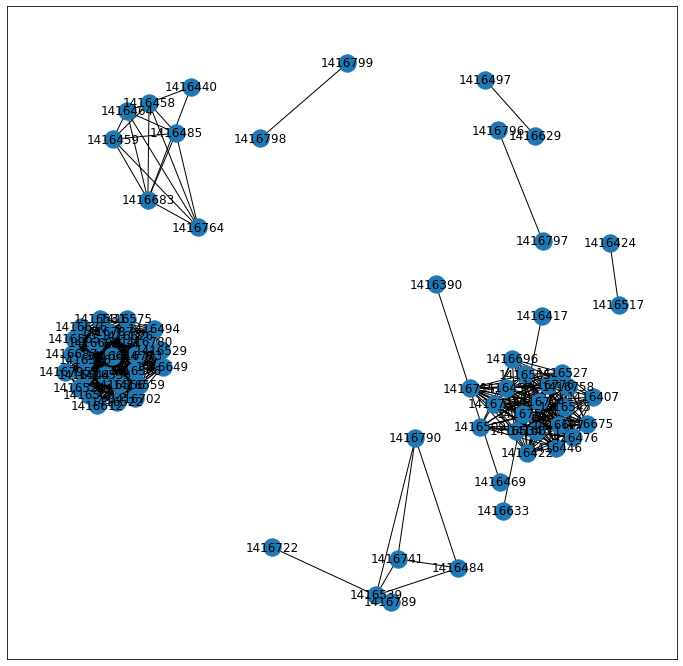

In [ ]:
#@title
import matplotlib.pyplot as plt 

Gs=nx.Graph()
Gs.add_edges_from(sim_pairs)
plt.figure(figsize=(12,12)) 
nx.draw_networkx(Gs,pos=nx.spring_layout(Gs, k=1, iterations=100))
plt.show()

# เวลาส่งของ Source code แต่ละกลุ่ม

[['1416797', '13:14'], ['1416798', '13:15'], ['1416799', '13:16']]
Source code id: ['1416494', '1416522', '1416524', '1416526', '1416529', '1416531', '1416544', '1416546', '1416553', '1416556', '1416559', '1416565', '1416566', '1416575', '1416612', '1416626', '1416644', '1416649', '1416676', '1416687', '1416699', '1416702', '1416773', '1416780', '1416787', '1416795']


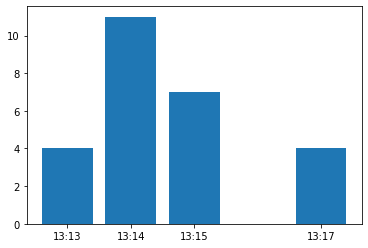

Source code id: ['1416407', '1416422', '1416446', '1416453', '1416476', '1416505', '1416509', '1416527', '1416534', '1416545', '1416671', '1416675', '1416696', '1416697', '1416710', '1416724', '1416755', '1416757', '1416758', '1416776']


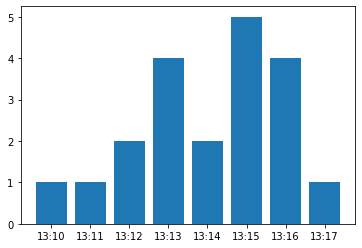

Source code id: ['1416440', '1416458', '1416459', '1416464', '1416485', '1416683', '1416764']


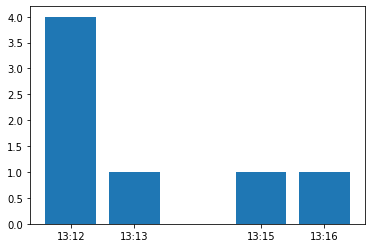

Source code id: ['1416484', '1416539', '1416741', '1416790']


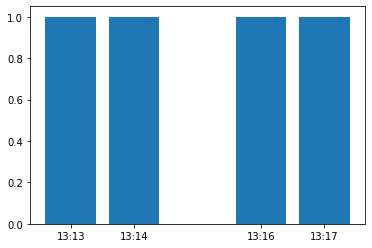

Source code id: ['1416798', '1416799']


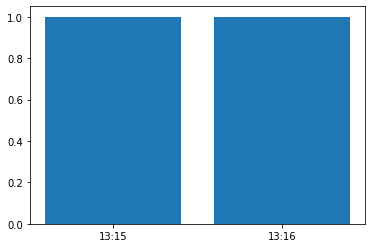

Source code id: ['1416796', '1416797']


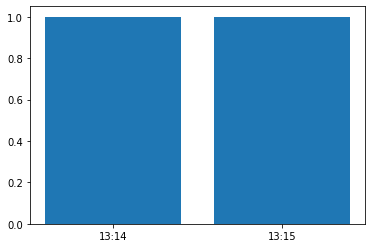

Source code id: ['1416722', '1416789']


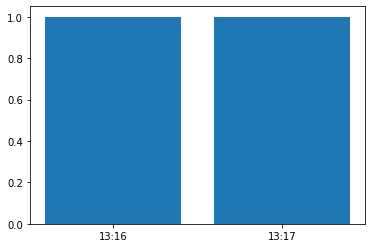

Source code id: ['1416497', '1416629']


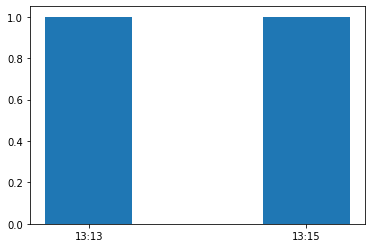

Source code id: ['1416424', '1416517']


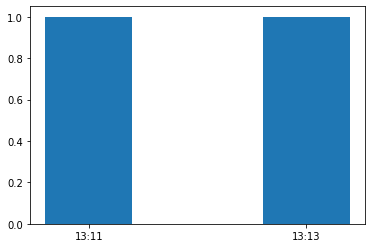

Source code id: ['1416417', '1416633']


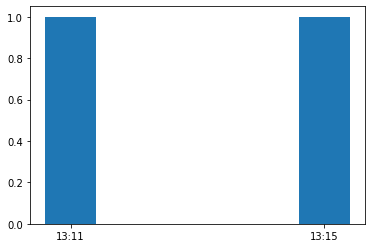

Source code id: ['1416390', '1416469']


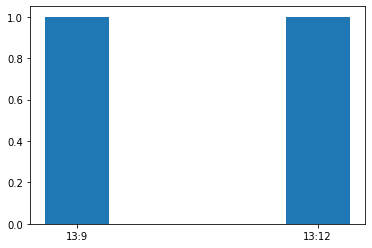

In [ ]:
#@title
from collections import Counter 

file=open('submission_time.csv')
lines=file.readlines()
file.close()
submissions=[line.strip().split(',') for line in lines[1:]]
print(submissions[-3:])
s_groups = find_groups(sim_pairs)
s_groups = sorted([(len(g),g) for g in s_groups],reverse=True)
s_groups = [g for (l,g) in s_groups]
time_dict = {s:t.split(':')[1] for [s,t] in submissions}
for g in s_groups:
  print('Source code id:',g)
  times = [int(time_dict[s]) for s in g]
  c=sorted([(t,c) for (t,c) in Counter(times).items()])
  plt.bar([tt for (tt,_) in c],[cc for (_,cc) in c])
  plt.xticks([tt for (tt,_) in c], ['13:'+str(tt) for (tt,_) in c])
  plt.show()

# กราฟแสดงผู้ใช้ที่ส่ง Source code คล้ายกัน 

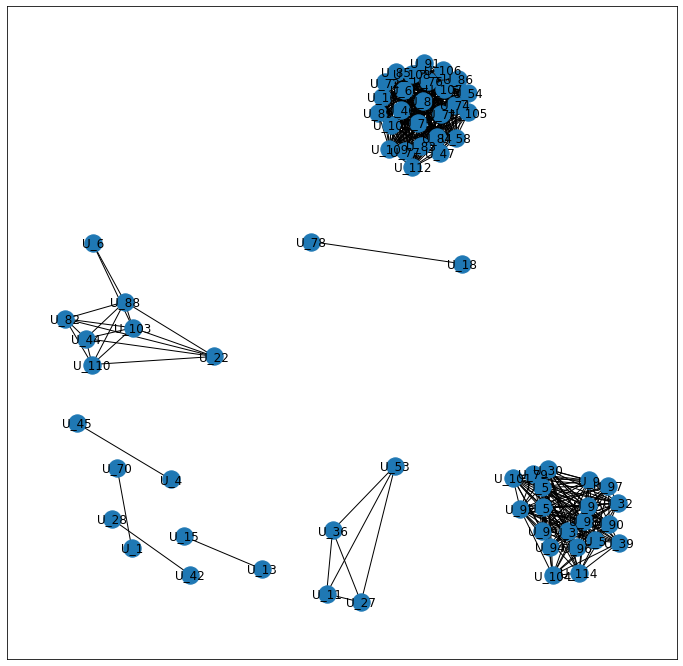

In [ ]:
#@title
import matplotlib.pyplot as plt 

Gu=nx.Graph()
Gu.add_edges_from(user_pairs)
plt.figure(figsize=(12,12)) 
nx.draw_networkx(Gu,pos=nx.spring_layout(Gu, k=1, iterations=100))
plt.show()

# กลุ่มผู้ใช้ที่ส่ง code คล้ายกัน

จำนวนผู้ใช้ 26 ['U_102', 'U_105', 'U_106', 'U_107', 'U_108', 'U_109', 'U_112', 'U_16', 'U_46', 'U_47', 'U_54', 'U_58', 'U_60', 'U_71', 'U_72', 'U_74', 'U_75', 'U_76', 'U_77', 'U_80', 'U_83', 'U_84', 'U_85', 'U_86', 'U_89', 'U_91']


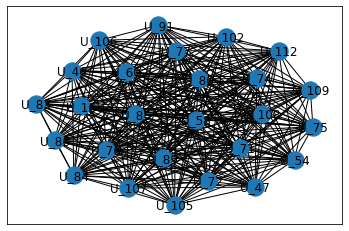

จำนวนผู้ใช้ 20 ['U_101', 'U_104', 'U_114', 'U_30', 'U_32', 'U_33', 'U_39', 'U_5', 'U_51', 'U_52', 'U_79', 'U_9', 'U_90', 'U_92', 'U_93', 'U_94', 'U_96', 'U_97', 'U_98', 'U_99']


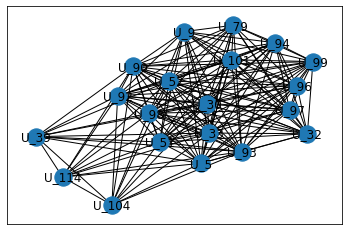

จำนวนผู้ใช้ 7 ['U_103', 'U_110', 'U_22', 'U_44', 'U_6', 'U_82', 'U_88']


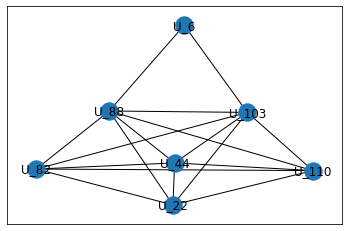

จำนวนผู้ใช้ 4 ['U_11', 'U_27', 'U_36', 'U_53']


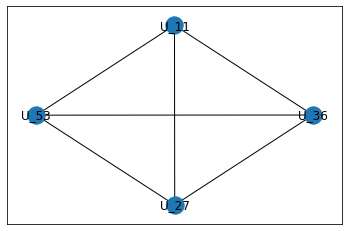

จำนวนผู้ใช้ 2 ['U_4', 'U_45']


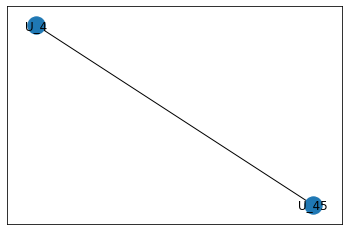

จำนวนผู้ใช้ 2 ['U_28', 'U_42']


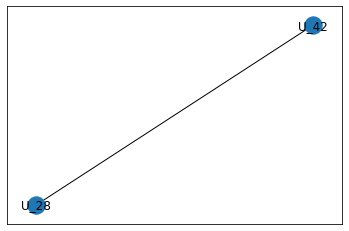

จำนวนผู้ใช้ 2 ['U_18', 'U_78']


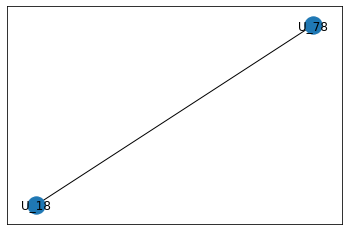

จำนวนผู้ใช้ 2 ['U_13', 'U_15']


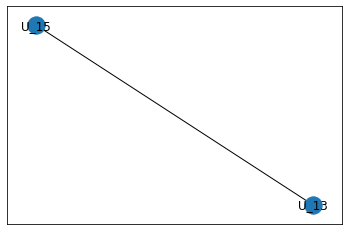

จำนวนผู้ใช้ 2 ['U_1', 'U_70']


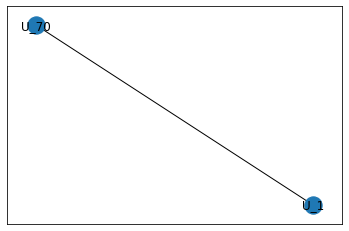

In [ ]:
#@title
groups = find_groups(user_pairs)
sorted_groups = sorted([(len(g),g) for g in groups],reverse=True)
for group in sorted_groups:
  print('จำนวนผู้ใช้',len(group[1]),group[1])
  show_G=Gu.subgraph(group[1])
  nx.draw_networkx(show_G)
  plt.show()

# ผู้ใช้ที่มีจำนวนผู้ใช้ที่มี source code คล้ายกันสูงสุด 50 อันดับแรก

In [ ]:
#@title
find_number_of_similar_users(user_pairs,50)

['U_102',
 'U_105',
 'U_106',
 'U_107',
 'U_108',
 'U_109',
 'U_112',
 'U_16',
 'U_46',
 'U_47',
 'U_54',
 'U_58',
 'U_60',
 'U_71',
 'U_72',
 'U_74',
 'U_75',
 'U_76',
 'U_77',
 'U_80',
 'U_83',
 'U_84',
 'U_85',
 'U_86',
 'U_89',
 'U_91',
 'U_30',
 'U_33',
 'U_5',
 'U_51',
 'U_52',
 'U_90',
 'U_92',
 'U_93',
 'U_98',
 'U_101',
 'U_32',
 'U_79',
 'U_9',
 'U_94',
 'U_96',
 'U_97',
 'U_99',
 'U_104',
 'U_114',
 'U_39',
 'U_103',
 'U_88',
 'U_110',
 'U_22']